In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import f1_score

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [4]:
#Load the data
data = pd.read_csv("../input/telecom-churn-data/telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
print("The data has :",data.shape[0],' rows and ',data.shape[1]," columns.")

The data has : 99999  rows and  226  columns.


In [6]:
data.describe(include = 'all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [8]:
#checking on Null values
null_sort = data.isnull().sum().sort_values(ascending=False)
nullCount_df = pd.DataFrame({"Features": null_sort.index,"count":null_sort.values})
nullCount_df["Null_perc"] = round(((nullCount_df['count']/len(data))*100),2)
nullCount_df.head(50)

,Features,count,Null_perc
0,count_rech_2g_6,74846,74.85
1,date_of_last_rech_data_6,74846,74.85
2,count_rech_3g_6,74846,74.85
3,av_rech_amt_data_6,74846,74.85
4,max_rech_data_6,74846,74.85
5,total_rech_data_6,74846,74.85
6,arpu_3g_6,74846,74.85
7,arpu_2g_6,74846,74.85
8,night_pck_user_6,74846,74.85
9,fb_user_6,74846,74.85


We could see that, there are 40 columns which have more than 70% of rows as null

In [9]:
# some recharge columns have minimum value of 1 while some don't
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

data[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [10]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
data.loc[data.total_rech_data_6.isnull() & data.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [11]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [12]:
# impute missing values with 0
data[zero_impute] = data[zero_impute].apply(lambda x: x.fillna(0))

In [13]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(data[zero_impute].isnull().sum()*100/data.shape[1])

# summary
print("\n\nSummary statistics\n")
print(data[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_

In [14]:
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [15]:
# replace missing values with '-1' in categorical columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [16]:
# missing value ratio
print("Missing value ratio:\n")
print(data[cat_cols].isnull().sum()*100/data.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64


In [17]:
#data.fillna(0, inplace = True)

In [18]:
#all the customers are unique
data['mobile_number'].nunique()

99999

In [19]:
#Getting the Training data that means filtering out all the High-Value customers
# based on Average daily recharge amount for months june and july
data['total_rech_amt'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/60

In [20]:
# the cut-off value for being a valuable customer is 70th percentile
cutoff_amt = np.round(data.total_rech_amt.quantile(0.7),2) #70th Percentile value
val_cust = data[data.total_rech_amt>=cutoff_amt]
val_cust.shape

(30011, 227)

In [21]:
val_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,12

In [22]:
#check if any null values in the attributes which we gonna use for marking the customer as churn and Non-Churn
val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [23]:
#label marking as churn: 1 and non-churn as 0
val_cust['churn'] = 0
val_cust.loc[(val_cust.total_ic_mou_9==0)& (val_cust.total_og_mou_9==0) & (val_cust.vol_2g_mb_9==0) & (val_cust.vol_3g_mb_9==0),'churn'] = 1

In [24]:
val_cust['churn'].describe()

count    30011.000000
mean         0.086402
std          0.280961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [25]:
val_cust['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [26]:
#filtering the columns of month 9 and dropping them as the month 9 is churn phase
months9 = []
for col in data.columns:
    if '_9' in col:
        months9.append(col)
val_cust.drop(months9,axis = 1, inplace = True)

In [27]:
val_cust.drop(['sep_vbc_3g'], axis = 1, inplace = True)

In [28]:
val_cust.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt,churn
count,3.001100e+04,30011.0,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.00000

In [29]:
#looks like some of the features has only zero values. Lets remove those columns which has constant values
const_col = [col for col in val_cust.columns if val_cust[col].nunique() == 1]
val_cust.drop(const_col,axis = 1, inplace = True)

In [30]:
val_cust.shape

(30011, 160)

<h2>Data Visualization</h2>

In [31]:
val_cust['churn'] = val_cust['churn'].map({1:'churn', 0: 'Non-Churn'})

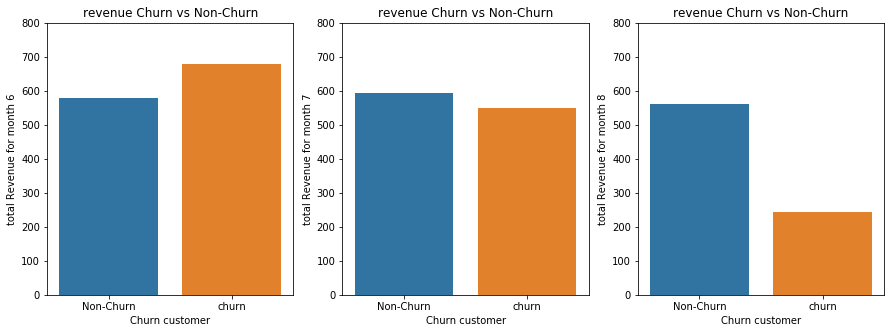

In [32]:
data6 = val_cust.groupby(['churn'])['arpu_6'].mean()
data7 = val_cust.groupby(['churn'])['arpu_7'].mean()
data8 = val_cust.groupby(['churn'])['arpu_8'].mean()
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total Revenue for month 6')
plt.ylim(0,800)
plt.xlabel('Churn customer')


plt.subplot(132)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('total Revenue for month 7')
plt.ylim(0,800)
plt.xlabel('Churn customer')

plt.subplot(133)
plt.title('revenue Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('total Revenue for month 8')
plt.ylim(0,800)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

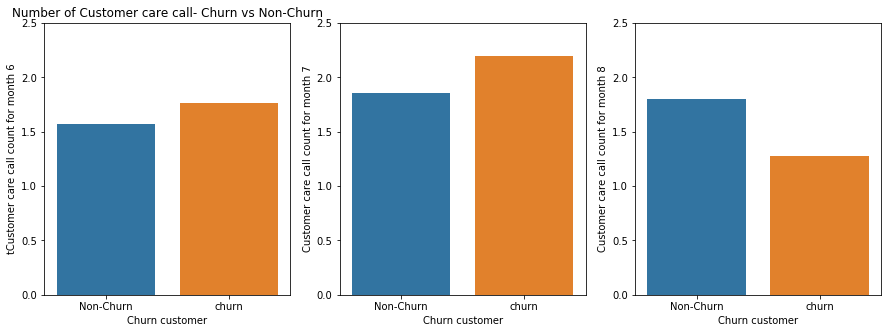

In [33]:
data6 = val_cust.groupby(['churn'])['loc_og_t2c_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['loc_og_t2c_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['loc_og_t2c_mou_8'].mean()

#set same x,y limits for all subplots
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('tCustomer care call count for month 6')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')

# 2nd Subplot shows the average amount of investment in each funding type.
plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('Customer care call count for month 7')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('Customer care call count for month 8')
plt.ylim(0,2.5)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

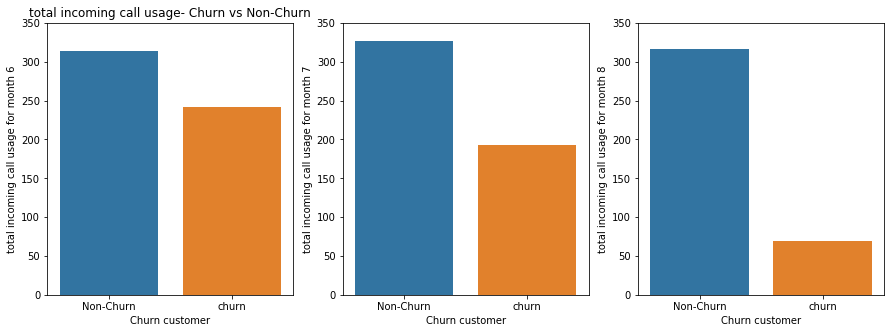

In [34]:
data6 = val_cust.groupby(['churn'])['total_ic_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['total_ic_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['total_ic_mou_8'].mean()

    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('total incoming call usage- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total incoming call usage for month 6')
plt.ylim(0,350)
plt.xlabel('Churn customer')

plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
plt.ylabel('total incoming call usage for month 7')
plt.ylim(0,350)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
plt.ylabel('total incoming call usage for month 8')
plt.ylim(0,350)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

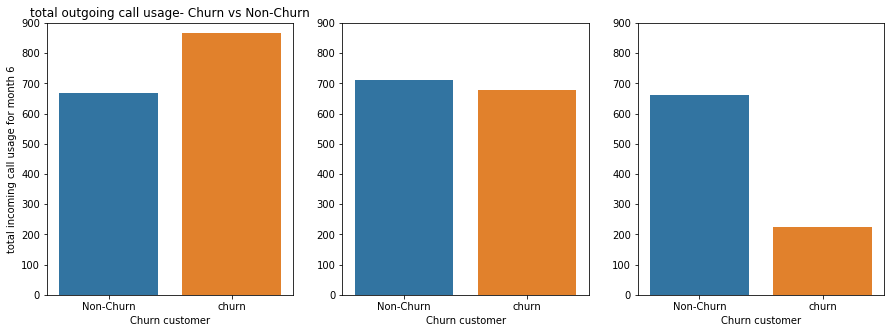

In [35]:
data6 = val_cust.groupby(['churn'])['total_og_mou_6'].mean()
data7 = val_cust.groupby(['churn'])['total_og_mou_7'].mean()
data8 = val_cust.groupby(['churn'])['total_og_mou_8'].mean()
    
plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('total outgoing call usage- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('total incoming call usage for month 6')
plt.ylim(0,900)
plt.xlabel('Churn customer')

plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
#plt.ylabel('total outgoing call usage for month 7')
plt.ylim(0,900)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
#plt.ylabel('total outgoing call usage for month 8')
plt.ylim(0,900)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

In [36]:
val_cust['net_vol_6'] = val_cust['vol_2g_mb_6']+ val_cust['vol_3g_mb_6']
val_cust['net_vol_7'] = val_cust['vol_2g_mb_7']+ val_cust['vol_3g_mb_7']
val_cust['net_vol_8'] = val_cust['vol_2g_mb_8']+ val_cust['vol_3g_mb_8']

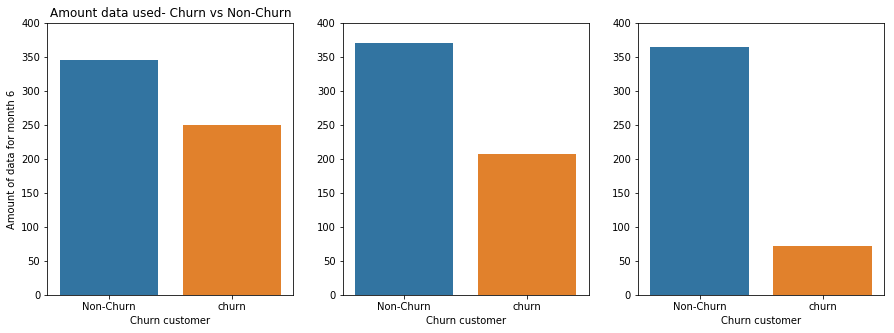

In [37]:
data6 = val_cust.groupby(['churn'])['net_vol_6'].mean()
data7 = val_cust.groupby(['churn'])['net_vol_7'].mean()
data8 = val_cust.groupby(['churn'])['net_vol_8'].mean()

plt.figure(figsize = (15,5))

plt.subplot(131)
plt.title('Amount data used- Churn vs Non-Churn')
sns.barplot(data6.index, data6.values)
plt.ylabel('Amount of data for month 6')
plt.ylim(0,400)
plt.xlabel('Churn customer')


plt.subplot(132)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data7.index, data7.values)
#plt.ylabel('total outgoing call usage for month 7')
plt.ylim(0,400)
plt.xlabel('Churn customer')

plt.subplot(133)
#plt.title('Number of Customer care call- Churn vs Non-Churn')
sns.barplot(data8.index, data8.values)
#plt.ylabel('total outgoing call usage for month 8')
plt.ylim(0,400)
plt.xlabel('Churn customer')
# plot the figure.
plt.show()

In the above Visualization Graph We observed that the network usage of Customer from good Phase to Action phase has significantly decreased either it is incoming Call or Outgoing Call Usage or it is Internet usage.

count    30011.000000
mean       587.284404
std        442.722413
min      -2258.709000
25%        364.161000
50%        495.682000
75%        703.922000
max      27731.088000
Name: arpu_6, dtype: float64


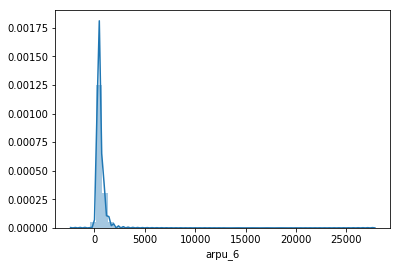

In [38]:
print(val_cust.arpu_6.describe())
sns.distplot(val_cust.arpu_6)

In [39]:
val_cust['churn'] = val_cust['churn'].map({"churn":1, "Non-Churn":0})
target = val_cust['churn']
train = val_cust.drop(['churn'], axis = 1)

In [40]:
num_col = [col for col in train.columns if train[col].dtype != 'object']

In [41]:
date_col = []
for col in train.columns:
    if 'date' in col:
        date_col.append(col)
date_col

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [42]:
train[date_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 6 columns):
date_of_last_rech_6         29949 non-null object
date_of_last_rech_7         29897 non-null object
date_of_last_rech_8         29417 non-null object
date_of_last_rech_data_6    11397 non-null object
date_of_last_rech_data_7    11662 non-null object
date_of_last_rech_data_8    11754 non-null object
dtypes: object(6)
memory usage: 1.6+ MB


In [43]:
for col in date_col:
    train[col] = pd.to_datetime(train[col], format = "%m/%d/%Y")

In [44]:
from datetime import datetime
#processing the date
#We will extract the weekday and day from each date feature 
def process_date(col):
    train[col+'weekday'] = train[col].dt.weekday
    train[col+'day'] = train[col].dt.day

In [45]:
for col in date_col:
    process_date(col)

In [46]:
#we have taken two columns out of each date attribute. we will drop the actual ones now
train.drop(date_col, axis = 1, inplace = True)

In [47]:
cust_id = train['mobile_number']
train.drop(['mobile_number'], axis = 1, inplace = True)

In [48]:
#filling the null values with zero
train.fillna(0, inplace = True)

<h2>Feature Engineering</h2>

In [49]:
train.shape , target.shape

((30011, 167), (30011,))

In [50]:
ic_og_features = [] #list containg all the incoming and outgoing call features
ic_og_good_prd = [] #list containg all the incoming and outgoing call features for 6th and 7th months
for col in train.columns:
    if "_ic_" in col:
        ic_og_features.append(col)
    if "_og_" in col:
        ic_og_features.append(col)
for col in ic_og_features:
    if "_6" in col:
        ic_og_good_prd.append(col)
    if "_7" in col:
        ic_og_good_prd.append(col)

In [51]:
#list describing different types of incoming and outgoing callscalls
roam_ic_features = []
loc_ic_features = []
std_ic_features = []
spl_ic_features = []
isd_ic_features = []
roam_og_features = []
loc_og_features = []
std_og_features = []
spl_og_features = []
isd_og_features = []
for col in ic_og_good_prd:
    if "roam_ic_" in col:
        roam_ic_features.append(col)
    if "loc_ic_" in col:
        loc_ic_features.append(col)
    if "std_ic_" in col:
        std_ic_features.append(col)
    if "spl_ic_" in col:
        spl_ic_features.append(col)
    if "isd_ic_" in col:
        isd_ic_features.append(col)
    if "roam_og_" in col:
        roam_og_features.append(col)
    if "loc_og_" in col:
        loc_og_features.append(col)
    if "std_og_" in col:
        std_og_features.append(col)
    if "spl_og_" in col:
        spl_og_features.append(col)
    if "isd_og_" in col:
        isd_og_features.append(col)

In [52]:
#totaling different kinds of incoming and outgoing calls 
train['total_roam_ic'] = 0
for col in roam_ic_features:
    train['total_roam_ic'] += train[col]
    
train['total_loc_ic'] = 0
for col in loc_ic_features:
    train['total_loc_ic'] += train[col]
    
train['total_std_ic'] = 0
for col in std_ic_features:
    train['total_std_ic'] += train[col]
    
train['total_spl_ic'] = 0
for col in spl_ic_features:
    train['total_spl_ic'] += train[col]
    
train['total_isd_ic'] = 0
for col in isd_ic_features:
    train['total_isd_ic'] += train[col]

train['total_roam_og'] = 0
for col in roam_og_features:
    train['total_roam_og'] += train[col]
    
train['total_loc_og'] = 0
for col in loc_og_features:
    train['total_loc_og'] += train[col]
    
train['total_std_og'] = 0
for col in std_og_features:
    train['total_std_og'] += train[col]
    
train['total_spl_og'] = 0
for col in spl_og_features:
    train['total_spl_og'] += train[col]
    
train['total_isd_og'] = 0
for col in isd_og_features:
    train['total_isd_og'] += train[col]

In [53]:
train['night_pck_good_prd'] = (train['night_pck_user_6']==1) & (train['night_pck_user_7']==1)# yes is night pack user for both good pahse months
train['fb_good_prd'] = (train['fb_user_6']==1) & (train['fb_user_7']==1) # if its a fb pack user in both month
train['night_nd_fb_user']  = train['night_pck_good_prd'] & train['fb_good_prd'] #if its both fb and night pack user

In [54]:
train['night_pck_good_prd'] = train['night_pck_good_prd'].map({True:1, False:0})
train['fb_good_prd'] = train['fb_good_prd'].map({True:1, False:0})
train['night_nd_fb_user'] = train['night_nd_fb_user'].map({True:1, False:0})

In [55]:
train['avg_rech_amt_per'] = train['total_rech_amt']
del train['total_rech_amt']

In [56]:
train['total_rech_num'] = train['total_rech_num_6'] + train['total_rech_num_7'] #total rech number for good phase
train['total_rech_data'] = train['total_rech_data_6'] + train['total_rech_data_7']#total rech data for good phase
train['total_count_rech_2g'] = train['count_rech_2g_6'] + train['count_rech_2g_7']#2g Rech counts for good phase
train['total_count_rech_3g'] = train['count_rech_3g_6'] + train['count_rech_3g_7']#3g Rech count for good phase
train['avg_rech_data'] = train['av_rech_amt_data_6'] + train['av_rech_amt_data_7']#average reacharge amount for 2 months

In [57]:
#total amount of internet used for each months
train['net_vol_6'] = train['vol_2g_mb_6']+ train['vol_3g_mb_6']
train['net_vol_7'] = train['vol_2g_mb_7']+ train['vol_3g_mb_7']
train['net_vol_8'] = train['vol_2g_mb_8']+ train['vol_3g_mb_8']

In [58]:
#total number of calls to customer care in good pahse
train['total_call_to_CC'] = train['loc_og_t2c_mou_6'] + train['loc_og_t2c_mou_7']

In [59]:
train.shape

(30011, 186)

<h3>Feature Selection Using RFE</h3>

In [117]:
#Splitting the data in train and test data
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 100)

In [89]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier(n_jobs = -1,random_state=2)
rfe = RFE(model, 100)   #out of 186 attribute we will select the top 100 attributes for the modeling.          
rfe = rfe.fit(x_train, y_train)

In [91]:
col = x_train.columns[rfe.support_] 
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'st

In [118]:
x_test = x_test[col]
x_train = x_train[col]

In [119]:
#scaling the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [120]:
x_train.shape, x_test.shape

((21007, 100), (9004, 100))

In [121]:
#lets do PCA and do the dimensionality reduction. It will also remove the Multi-Collinearity
pca = PCA(0.90, random_state=100)
train_pca = pca.fit_transform(x_train)
train_pca.shape

(21007, 34)

In [122]:
test_pca = pca.transform(x_test)
test_pca.shape

(9004, 34)

In [123]:
train_pca.shape, test_pca.shape

((21007, 34), (9004, 34))

So we have done the dimensionality reduction from <b>100 features to just 34 principal components</b> at the penalty of 10 percent data variance loss. But we have reduce the computation cost

<h2>Modelling</h2>

In [158]:
from sklearn.metrics import roc_auc_score
#Fitting default Logistic Regression
lgr = LogisticRegression(random_state=2)
lgr.fit(train_pca, y_train)

y_pred_prob_lgr = lgr.predict_proba(test_pca)[:,1]
y_pred_lgr = lgr.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_lgr ),"\n", "Recall Score", recall_score(y_test, y_pred_lgr))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_lgr))

Precision Score 0.6710963455149501 
 Recall Score 0.2623376623376623
ROC-AUC score 0.8970270560141826


In [159]:
#fitting the default Random Forest Classifier
rf = RandomForestClassifier(random_state=2)
rf.fit(train_pca, y_train)

y_pred_prob_rf = rf.predict_proba(test_pca)[:,1]
y_pred_rf = rf.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_rf ),"\n", "Recall Score", recall_score(y_test, y_pred_rf))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_rf))

Precision Score 0.5984251968503937 
 Recall Score 0.1974025974025974
ROC-AUC score 0.841405133608194


In [103]:
#Using the Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [161]:
y_pred_prob_gnb = gnb.predict_proba(test_pca)[:,1]
y_pred_gnb = gnb.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_gnb ),"\n", "Recall Score", recall_score(y_test, y_pred_gnb))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_gnb))

Precision Score 0.3104738154613466 
 Recall Score 0.3233766233766234
ROC-AUC score 0.8309696254680466


In [162]:
evl_df = pd.DataFrame({'algo':['logreg','rf', 'gnb'],'ROC-AUC score':[roc_auc_score(y_test,y_pred_prob_lgr), 
                                                                       roc_auc_score(y_test,y_pred_prob_rf),
                                                                       roc_auc_score(y_test,y_pred_prob_gnb)]})

In [163]:
evl_df['precision'] = pd.Series([precision_score(y_test,y_pred_lgr), precision_score(y_test,y_pred_rf),precision_score(y_test, y_pred_gnb)])
evl_df['recall'] = pd.Series([recall_score(y_test,y_pred_lgr), recall_score(y_test,y_pred_rf),recall_score(y_test, y_pred_gnb)])
evl_df.head()

,algo,ROC-AUC score,precision,recall
0,logreg,0.897027,0.671096,0.262338
1,rf,0.841405,0.598425,0.197403
2,gnb,0.830970,0.310474,0.323377


In [170]:
y_train.value_counts()

0    19184
1     1823
Name: churn, dtype: int64

In [171]:
#lets hypertune the Logistic Regression using GridSearchCV
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state=2)
params = [{'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
logreg = LogisticRegression(random_state=2, class_weight = {0:1,1:10})
GridSearch = GridSearchCV(logreg, params, scoring = 'roc_auc',cv=folds, verbose=1, return_train_score=True)
GridSearch.fit(train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    5.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight={0: 1, 1: 10},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [172]:
print("The best C value is: ",GridSearch.best_params_)
print("The best ROC_AUC Value is: ",GridSearch.best_score_)

The best C value is:  {'C': 1}
The best ROC_AUC Value is:  0.8856059775081847


In [173]:
logreg = LogisticRegression(C = 1, random_state=2)
logreg.fit(train_pca,y_train)

y_pred_prob_lgr = logreg.predict_proba(test_pca)[:,1]
y_pred_lgr = logreg.predict(test_pca)
print("Precision Score", precision_score(y_test, y_pred_lgr ),"\n", "Recall Score", recall_score(y_test, y_pred_lgr))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_lgr))

Precision Score 0.6710963455149501 
 Recall Score 0.2623376623376623
ROC-AUC score 0.8970270560141826


In [175]:
err = []
y_pred_test_lr=[]
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=1993)
i=1

for train_index, test_index in fold.split(train_pca,y_train):
    x_trn, x_val = train_pca[train_index], train_pca[test_index]
    y_trn, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    logreg = LogisticRegression(C = 1, class_weight = {0:1,1:10},random_state=2)
    print(x_trn.shape, y_trn.shape)
    logreg.fit(x_trn, y_trn)

    preds = logreg.predict_proba(test_pca)[:,1]
    print("ROC_AUC Score: ", roc_auc_score(y_test, preds))
    err.append(roc_auc_score(y_test, preds))
    print(f'--------------------Fold {i} completed !!!------------------')
    i=i+1
    y_pred_test_lr.append(preds)
print("Mean ROC_AUC Score: ", roc_auc_score(y_test, np.mean(y_pred_test_lr,0)))

(18905, 34) (18905,)
ROC_AUC Score:  0.8976029071729825
--------------------Fold 1 completed !!!------------------
(18905, 34) (18905,)
ROC_AUC Score:  0.8969018229766347
--------------------Fold 2 completed !!!------------------
(18905, 34) (18905,)
ROC_AUC Score:  0.8975685232911368
--------------------Fold 3 completed !!!------------------
(18906, 34) (18906,)
ROC_AUC Score:  0.8971800485159728
--------------------Fold 4 completed !!!------------------
(18907, 34) (18907,)
ROC_AUC Score:  0.8969459857606565
--------------------Fold 5 completed !!!------------------
(18907, 34) (18907,)
ROC_AUC Score:  0.8976423382301449
--------------------Fold 6 completed !!!------------------
(18907, 34) (18907,)
ROC_AUC Score:  0.8983372711815752
--------------------Fold 7 completed !!!------------------
(18907, 34) (18907,)
ROC_AUC Score:  0.8970442479551054
--------------------Fold 8 completed !!!------------------
(18907, 34) (18907,)
ROC_AUC Score:  0.8975079571873354
--------------------Fold

In [176]:
#Handling Class Imbalance problem, we can use Bagging technique also
from sklearn.ensemble import BaggingClassifier

bg_clf = BaggingClassifier(logreg, n_estimators = 30, max_samples = 100, n_jobs = -1,
                          bootstrap = True)
bg_clf.fit(train_pca, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1,
                                                    class_weight={0: 1, 1: 10},
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=2,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=30, n_jobs=-1, 

In [177]:
y_pred_lgr = bg_clf.predict(test_pca)
y_pred_prob_lgr = bg_clf.predict_proba(test_pca)[:,1]
print("Precision Score", precision_score(y_test, y_pred_lgr ),"\n", "Recall Score", recall_score(y_test, y_pred_lgr))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_lgr))

Precision Score 0.5171232876712328 
 Recall Score 0.5883116883116883
ROC-AUC score 0.892748628587832


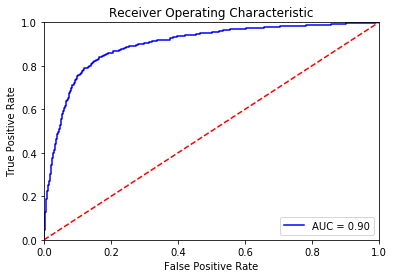

In [179]:
#lets do the AUC-ROC curve for the model
preds_lr_cv = np.mean(y_pred_test_lr,0)
fpr, tpr, threshold = roc_curve(y_test, preds_lr_cv)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

That's a Good sign about the model, The Area Under the Curve (AUC) is 0.90 which is quite good.

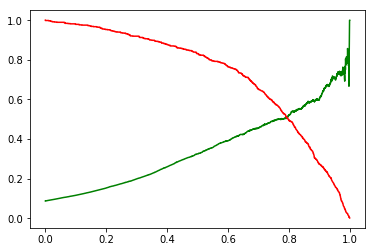

In [180]:
#Lets check the Precision-Recall trade-off and find out the optimal threshold
from sklearn.metrics import precision_recall_curve
churn_df = pd.DataFrame({'churn':y_test.values,'pred_prob':preds_lr_cv})

p, r, thresholds = precision_recall_curve(churn_df.churn, churn_df.pred_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [181]:
churn_df['final_pred'] = churn_df.pred_prob.map(lambda x: 1 if x > 0.79 else 0)

print("Precision Score: ", precision_score(churn_df['churn'], churn_df['final_pred'] ), "Recall Score: ", 
      recall_score(churn_df['churn'],churn_df['final_pred']))
fpr, tpr, thresholds = roc_curve(churn_df['churn'], churn_df['final_pred'])
print(auc(fpr, tpr))

Precision Score:  0.5044472681067345 Recall Score:  0.5155844155844156
0.7341099148604614


In [185]:
#Now Lets Tune the Random Forest classifier and check if we are able to get higher Recall Value
param_grid = [
{'n_estimators': [15, 25, 35], 'max_features': [10,20,25], 
 'max_depth': [40,50,60]}
]

grid_search_forest = GridSearchCV(rf, param_grid, cv=folds, scoring='roc_auc',n_jobs= -1)
grid_search_forest.fit(train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
          

In [186]:
print("The best C value is: ",grid_search_forest.best_params_)
print("The best Recall Value is: ",grid_search_forest.best_score_)

The best C value is:  {'max_depth': 40, 'max_features': 10, 'n_estimators': 35}
The best Recall Value is:  0.8728600236101136


In [187]:
#we have kept bootstrap =True, which will enable Bagging. Bagging tackles Class imbalance Problem.
GS_rf = RandomForestClassifier(n_estimators=35,max_depth=40, max_features = 10,bootstrap=True, random_state=2)
GS_rf.fit(train_pca,y_train)

y_pred_rf = GS_rf.predict(test_pca)
y_pred_prob_rf = GS_rf.predict_proba(test_pca)[:,1]
print("Precision Score", precision_score(y_test, y_pred_rf ),"\n", "Recall Score", recall_score(y_test, y_pred_rf))
print( "ROC-AUC score", roc_auc_score(y_test,y_pred_prob_rf))

Precision Score 0.6095505617977528 
 Recall Score 0.2818181818181818
ROC-AUC score 0.8837387897504488


In [188]:
err_rf = []
y_pred_test_rf=[]
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
fold=StratifiedKFold(n_splits=10, shuffle=True, random_state=1993)
i=1

for train_index, test_index in fold.split(train_pca,y_train):
    x_trn, x_val = train_pca[train_index], train_pca[test_index]
    y_trn, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    rf = RandomForestClassifier(n_estimators=35,max_depth=40, max_features = 10,bootstrap=True, random_state=2)

    rf.fit(x_trn, y_trn)

    preds = rf.predict_proba(test_pca)[:,1]
    print("ROC_AUC Score: ", roc_auc_score(y_test, preds))
    err_rf.append(roc_auc_score(y_test, preds))
    print(f'--------------------Fold {i} completed !!!------------------')
    i=i+1
    y_pred_test_rf.append(preds)
print("Mean ROC_AUC Score: ", roc_auc_score(y_test, np.mean(y_pred_test_rf,0)))

ROC_AUC Score:  0.8815201618881483
--------------------Fold 1 completed !!!------------------
ROC_AUC Score:  0.885009810447022
--------------------Fold 2 completed !!!------------------
ROC_AUC Score:  0.8844410568785113
--------------------Fold 3 completed !!!------------------
ROC_AUC Score:  0.8890455791475952
--------------------Fold 4 completed !!!------------------
ROC_AUC Score:  0.8832718471715313
--------------------Fold 5 completed !!!------------------
ROC_AUC Score:  0.8810234882921305
--------------------Fold 6 completed !!!------------------
ROC_AUC Score:  0.8832360437716279
--------------------Fold 7 completed !!!------------------
ROC_AUC Score:  0.8800565599083938
--------------------Fold 8 completed !!!------------------
ROC_AUC Score:  0.8810773511162143
--------------------Fold 9 completed !!!------------------
ROC_AUC Score:  0.8819817418432915
--------------------Fold 10 completed !!!------------------
Mean ROC_AUC Score:  0.8987244841629102


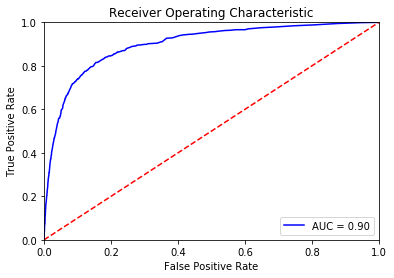

In [189]:
#lets do the AUC-ROC curve for the model
preds = np.mean(y_pred_test_rf,0)
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

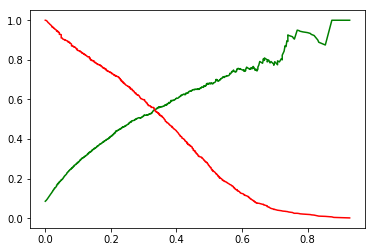

In [190]:
#Lets check the Precision-Recall trade-off and find out the optimal threshold
from sklearn.metrics import precision_recall_curve
churn_df = pd.DataFrame({'churn':y_test.values,'pred_prob':np.mean(y_pred_test_rf,0)})

p, r, thresholds = precision_recall_curve(churn_df.churn, churn_df.pred_prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [191]:
churn_df['final_pred'] = churn_df.pred_prob.map(lambda x: 1 if x > 0.33 else 0)

print("Precision Score: ", precision_score(churn_df['churn'], churn_df['final_pred'] ), "Recall Score: ", 
      recall_score(churn_df['churn'],churn_df['final_pred']))

print("Accuracy Score:", accuracy_score(churn_df['churn'], churn_df['final_pred']))

Precision Score:  0.5436156763590392 Recall Score:  0.5584415584415584
Accuracy Score: 0.9221457130164371


<h3>Conclusion</h3>

After HyperTuning and Comparing the Logistic Regression and Random Forest Classifier, below are the observations:
- The Area Under the curve for  Logistic Regression is 0.89 and 0.84 for Random Forest
- After hypertuning and handling the class Imbalance problem, the best accuracy we could achieve is 0.90 for LR          model and for RF the best accuracy is 0.92.
- The RECALL is 0.55 for Logistic Regression and 0.56 for the Random Forest.
- Since, the Recall is important in this case as the company would want to identify more Actual Churn customer on       the penalty of few Non-Churn customer identified as Churn. Hence, we used Precision-Recall trade-off graph,
  which gave 0.51 Recall and 0.73 AUC-ROC score for Logistic Regression at a very high threshhold value of 0.8. But, The Random Forest Classifier gave  0.56 Recall and 0.92 AUC-ROC score at Threshold of 0.33 which is quite good.

So looking at the Recall and accuracy score above we can conclude that the Random Forest Classifier has outperformed the Logistic Regression when we give importance to RECALL and select the optimum Threshold out of Precision-Recall Tradeoff.

We have used RECALL as a deciding evaluation metric because Recall is the True Positive Rate and it tries to minimize False negative (Churn classified as Non-Churn) and maximize the True Positive (Churn Classified as churn). This will help company to put the advertisments and spending to the right customer.